In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import cv2

In [3]:
img = cv2.imread("image_new.jpeg")

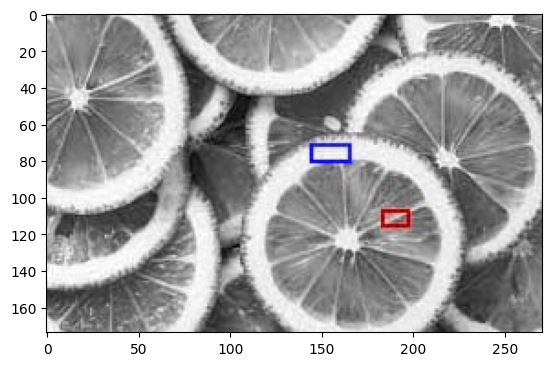

In [4]:
plt.imshow(img)

### Method 1

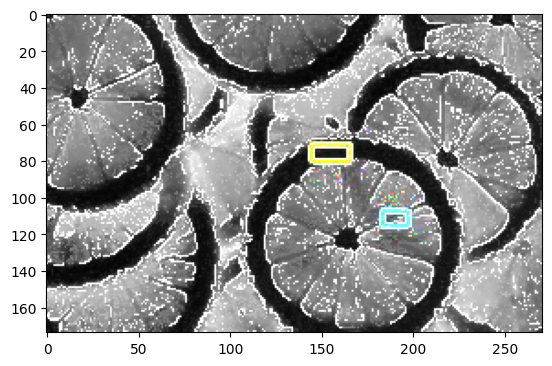

In [14]:
blur_img = cv2.GaussianBlur(img, (3, 3), 1)

edges = cv2.Canny(blur_img, 210, 250)

inverse_edges = cv2.bitwise_not(edges)

mrg_img = cv2.bitwise_and(img, blur_img, mask=inverse_edges)

out_img = cv2.bitwise_not(mrg_img)

plt.imshow(out_img, cmap='gray')

### Method 2

In [104]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_r = gray.copy().reshape(gray.shape[0]*gray.shape[1])

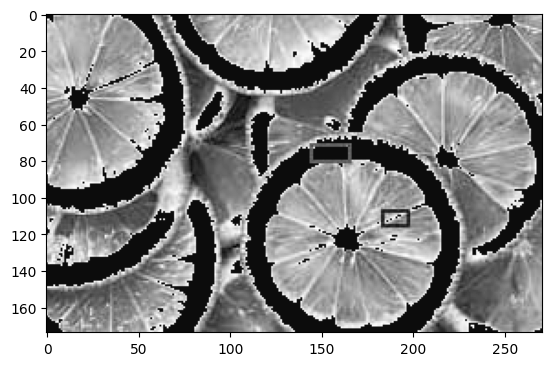

In [ ]:
for i in range(gray_r.shape[0]):
    if gray_r[i] > 200:
        gray_r[i] = 1

grey = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(grey, cmap='gray')

### Method 3

In [ ]:
image = cv2.imread("image_new.jpeg")

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = image_rgb.reshape((-1, 3))

# Perform k-means clustering
num_clusters = 2 # You can adjust this value based on your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(pixels)

# Get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Assign each pixel to its corresponding cluster center
segmented_image = centers[labels].reshape(image_rgb.shape)

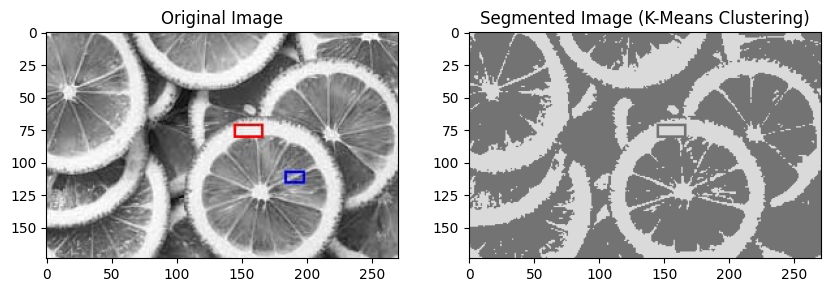

In [ ]:
# Display the original image and the segmented image
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(122)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Segmented Image (K-Means Clustering)')

plt.show()

### Not working Method

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_depth_map(focused_depth, layer_depth):
    """
    Create a depth map based on the difference between focused depth and layer depth.

    Parameters:
    - focused_depth: Depth of the focused object.
    - layer_depth: Depth of the current layer.

    Returns:
    - Depth map.
    """
    depth_map = np.abs(layer_depth - focused_depth)
    return cv2.normalize(depth_map, None, 0, 1, cv2.NORM_MINMAX)

def depth_aware_blur(image, focused_depth, depth_layers):
    """
    Apply depth-aware blur to an image.

    Parameters:
    - image: Input image.
    - focused_depth: Depth of the focused object.
    - depth_layers: Dictionary containing depth layers and their depths.

    Returns:
    - Depth-aware blurred image.
    """
    # Initialize an empty depth map
    depth_map = np.zeros_like(image, dtype=np.float32)

    # Create depth map by combining individual layers
    for layer, layer_depth in depth_layers.items():
        depth_map += create_depth_map(focused_depth, layer_depth)

    # Normalize the depth map to [0, 1]
    depth_map = cv2.normalize(depth_map, None, 0, 1, cv2.NORM_MINMAX)

    # Apply depth-aware blur using the depth map as a mask
    depth_aware_blur_image = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)
    depth_aware_blur_image[:, :, 3] = (depth_map * 255).astype(np.uint8)
    depth_aware_blur_image = cv2.GaussianBlur(depth_aware_blur_image, (0, 0), 5)

    # Remove alpha channel and convert back to RGB
    depth_aware_blur_image = cv2.cvtColor(depth_aware_blur_image, cv2.COLOR_RGBA2RGB)

    return depth_aware_blur_image

image = cv2.imread('Cat.jpg')

# Convert BGR image to RGB (if using OpenCV)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define depth layers and their depths
depth_layers = {
    'focused_object': 0.0,
    'far_background': -0.2,
    'near_background_foreground': 0.2,
}

# Depth of the focused object
focused_depth = 0.0

# Apply depth-aware blur
depth_aware_blur_image = depth_aware_blur(image, focused_depth, depth_layers)

# Display the original and depth-aware blurred images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(depth_aware_blur_image)
plt.title('Depth-Aware Blurred Image')

plt.show()

ValueError: operands could not be broadcast together with shapes (299,168,3) (4,1) (299,168,3) 

In [38]:
# segmented_image = cv2.bitwise_not(segmented_image)

In [24]:
segmented_image

array([[[218.51696777, 218.15112305, 218.31060791],
        [218.51696777, 218.15112305, 218.31060791],
        [218.51696777, 218.15112305, 218.31060791],
        ...,
        [115.8960351 , 115.23659409, 115.88027299],
        [115.8960351 , 115.23659409, 115.88027299],
        [115.8960351 , 115.23659409, 115.88027299]],

       [[218.51696777, 218.15112305, 218.31060791],
        [218.51696777, 218.15112305, 218.31060791],
        [218.51696777, 218.15112305, 218.31060791],
        ...,
        [115.8960351 , 115.23659409, 115.88027299],
        [115.8960351 , 115.23659409, 115.88027299],
        [115.8960351 , 115.23659409, 115.88027299]],

       [[218.51696777, 218.15112305, 218.31060791],
        [218.51696777, 218.15112305, 218.31060791],
        [218.51696777, 218.15112305, 218.31060791],
        ...,
        [115.8960351 , 115.23659409, 115.88027299],
        [115.8960351 , 115.23659409, 115.88027299],
        [115.8960351 , 115.23659409, 115.88027299]],

       ...,

      

In [25]:
cv2.bitwise_not(segmented_image)

array([[[-0.02020057, -0.02024522, -0.02022576],
        [-0.02020057, -0.02024522, -0.02022576],
        [-0.02020057, -0.02024522, -0.02022576],
        ...,
        [-0.03716014, -0.03748213, -0.03716784],
        [-0.03716014, -0.03748213, -0.03716784],
        [-0.03716014, -0.03748213, -0.03716784]],

       [[-0.02020057, -0.02024522, -0.02022576],
        [-0.02020057, -0.02024522, -0.02022576],
        [-0.02020057, -0.02024522, -0.02022576],
        ...,
        [-0.03716014, -0.03748213, -0.03716784],
        [-0.03716014, -0.03748213, -0.03716784],
        [-0.03716014, -0.03748213, -0.03716784]],

       [[-0.02020057, -0.02024522, -0.02022576],
        [-0.02020057, -0.02024522, -0.02022576],
        [-0.02020057, -0.02024522, -0.02022576],
        ...,
        [-0.03716014, -0.03748213, -0.03716784],
        [-0.03716014, -0.03748213, -0.03716784],
        [-0.03716014, -0.03748213, -0.03716784]],

       ...,

       [[-0.02020057, -0.02024522, -0.02022576],
        [-0

In [28]:
cv2.Canny(segmented_image.astype(np.uint8), 210, 250)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0, 255, 255],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [105]:
gray_r

array([227, 215, 232, ..., 223, 230, 231], dtype=uint8)

In [82]:
gray_r.shape

(47154,)

In [83]:
gray.shape

(174, 271)

In [84]:
174*271

47154

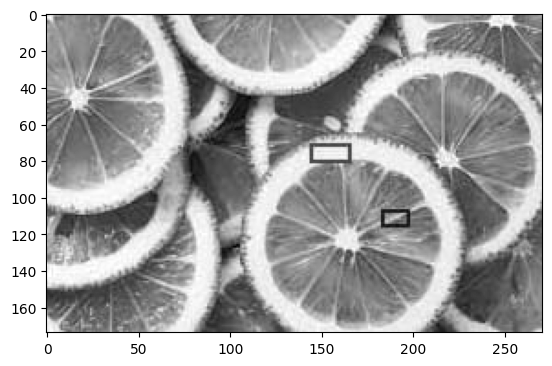

In [96]:
plt.imshow(gray, cmap='gray')